In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


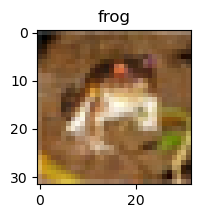

In [9]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_sample(x, y, index):
    plt.figure(figsize=(2,2))
    plt.imshow(x[index])
    plt.title(class_names[int(y[index])])
    plt.show()

plot_sample(x_train, y_train, 0)


In [12]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [13]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Additional Convolutional and Pooling Layers
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


e:\projects\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
batch_size = 64
epochs = 20
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test))


Epoch 1/20


e:\projects\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.2430 - loss: 2.0154 - val_accuracy: 0.4609 - val_loss: 1.5062
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.3850 - loss: 1.6577 - val_accuracy: 0.5178 - val_loss: 1.3371
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.4359 - loss: 1.5431 - val_accuracy: 0.5709 - val_loss: 1.2262
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.4669 - loss: 1.4663 - val_accuracy: 0.5554 - val_loss: 1.2263
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 58ms/step - accuracy: 0.4902 - loss: 1.4166 - val_accuracy: 0.6061 - val_loss: 1.1076
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 58ms/step - accuracy: 0.5000 - loss: 1.3795 - val_accuracy: 0.6122 - val_loss: 1.0844
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.5128 - loss: 1.3585 - val_accuracy: 0.6223 - val_loss: 1.0683
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.5189 - loss: 1.3345 - val_accurac

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0992 - loss: 2.3102
Test accuracy: 0.0991


In [24]:
#save the model
model.save('cnn_model.h5')  
